In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt 
from matplotlib import style 
from sklearn.cluster import KMeans 
from sklearn.metrics import v_measure_score 

In [2]:
from sklearn.cluster import MeanShift,  estimate_bandwidth
from mpl_toolkits.mplot3d import Axes3D

In [3]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import Normalizer

In [4]:
df= pd.read_csv("other_cluster.csv")
df.head()

,Solar Irradiance,PV Current,PV Voltage,PV Energy,PV Power
0,687.777329,59.7,19.4,0.0,1158.18
1,682.161725,59.5,26.8,0.0,1594.60
2,680.716653,59.4,16.1,0.0,956.34
3,671.497006,59.3,9.1,0.0,539.63
4,673.493383,59.3,25.2,0.0,1494.36


In [5]:
df.drop('PV Power', axis=1, inplace=True)

In [6]:
features = ["Solar Irradiance",'PV Current','PV Voltage']

X = df.loc[:, features].values
# Separating out the target
y = df.loc[:,'PV Energy'].values
X_duplicate = X.copy()

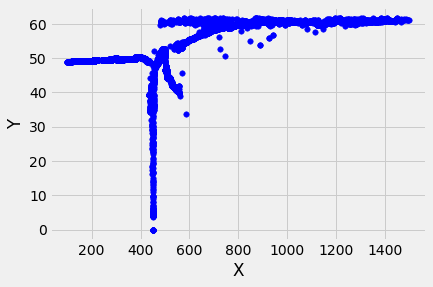

<Figure size 432x288 with 0 Axes>

In [7]:
style.use("fivethirtyeight")
plt.scatter(X[:, 0], X[:, 1], s = 30, color ='b') 
  
# label the axes 
plt.xlabel('X') 
plt.ylabel('Y') 
  
plt.show() 
plt.clf() # clear the figure 

In [8]:
X = StandardScaler().fit_transform(X)
X = Normalizer().fit_transform(X)

In [9]:
y = y.flatten()

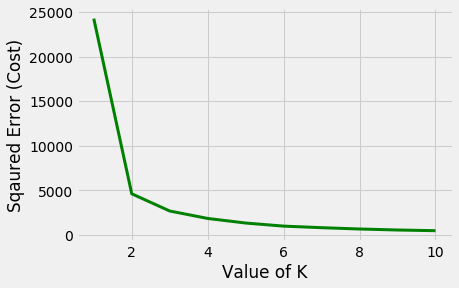

In [10]:
cost = list()
for i in range(1, 11): 
    KM = KMeans(n_clusters = i, max_iter = 500) 
    KM.fit(X) 
    cost.append(KM.inertia_)      

plt.plot(range(1, 11), cost, color ='g', linewidth ='3') 
plt.xlabel("Value of K") 
plt.ylabel("Sqaured Error (Cost)") 
plt.show() # clear the plot 

In [11]:
n_clusters, v_scores = list(),list()
for i in range(2,8):
    kmeans = KMeans(n_clusters = i)
    kmeans.fit(X)
    labels = kmeans.predict(X)
    v_scores.append(v_measure_score(y,labels))
    n_clusters.append(i)

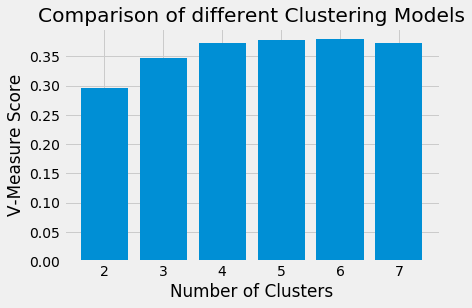

In [12]:
plt.bar(n_clusters, v_scores) 
plt.xlabel('Number of Clusters') 
plt.ylabel('V-Measure Score') 
plt.title('Comparison of different Clustering Models') 
plt.show() 

In [13]:
bandwidth = estimate_bandwidth(X_duplicate, quantile=0.2, n_samples=500)
bandwidth

117.74077011703073

In [14]:
ms = MeanShift(bandwidth=bandwidth) 
ms.fit(X_duplicate) 

MeanShift(bandwidth=117.74077011703073, bin_seeding=False, cluster_all=True,
          max_iter=300, min_bin_freq=1, n_jobs=None, seeds=None)

In [15]:
labels = ms.labels_
labels_unique = np.unique(labels)
n_clusters_ = len(labels_unique)

In [16]:
df['clusters_pred']= labels

In [17]:
df.to_csv('result.csv',index=False)

In [18]:
n_clusters_

6

In [20]:
P = ms.predict(X_duplicate)
P

array([2, 2, 2, ..., 3, 3, 3], dtype=int64)

In [22]:
cluster_centers = ms.cluster_centers_ 
cluster_centers

array([[ 251.23136756,   49.42404134,   90.76092842],
       [ 861.46171324,   60.37955924,  202.88795608],
       [ 693.86827587,   58.28694414,  108.86516172],
       [ 558.05814055,   51.70591033,   88.03592097],
       [1358.57020402,   60.85166241,  207.09300095],
       [1038.5722025 ,   60.75      ,  529.95      ]])

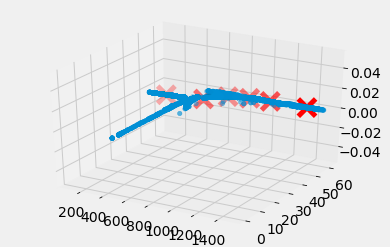

In [26]:
fig = plt.figure()
ax = fig.add_subplot(111, projection ='3d') 
ax.scatter(X_duplicate[:, 0], X_duplicate[:, 1], marker ='o') 
ax.scatter(cluster_centers[:, 0], cluster_centers[:, 1], 
            marker ='x', color ='red', 
           s = 300, linewidth = 5, zorder = 10) 
plt.show() 

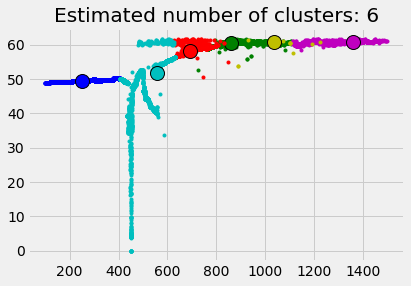

In [24]:
from itertools import cycle

colors = cycle('bgrcmykbgrcmykbgrcmykbgrcmyk')
for k, col in zip(range(n_clusters_), colors):
    my_members = labels == k
    cluster_center = cluster_centers[k]
    plt.plot(X_duplicate[my_members, 0], X_duplicate[my_members, 1], col + '.')
    plt.plot(cluster_center[0], cluster_center[1], 'o', markerfacecolor=col,
             markeredgecolor='k', markersize=14)
plt.title('Estimated number of clusters: %d' % n_clusters_)
plt.show()